In [2]:
# IMPORTS
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv

In [9]:
# Prepare the data
data = []
with open('A2Q1.csv') as file:    
    csv_reader = csv.reader(file)    
    for row in csv_reader:  
        row = np.array(row)
        
        row = row.astype(float)
        data.append(row)

data = np.array(data)     

In [4]:
data.shape

(400, 50)

(i) Determine which probabilisitic mixture could have generated this data (It is
not a Gaussian mixture). Derive the EM algorithm for your choice of mixture
and show your calculations. Write a piece of code to implement the algorithm
you derived by setting the number of mixtures K = 4. Plot the log-likelihood
(averaged over 100 random initializations) as a function of iterations.

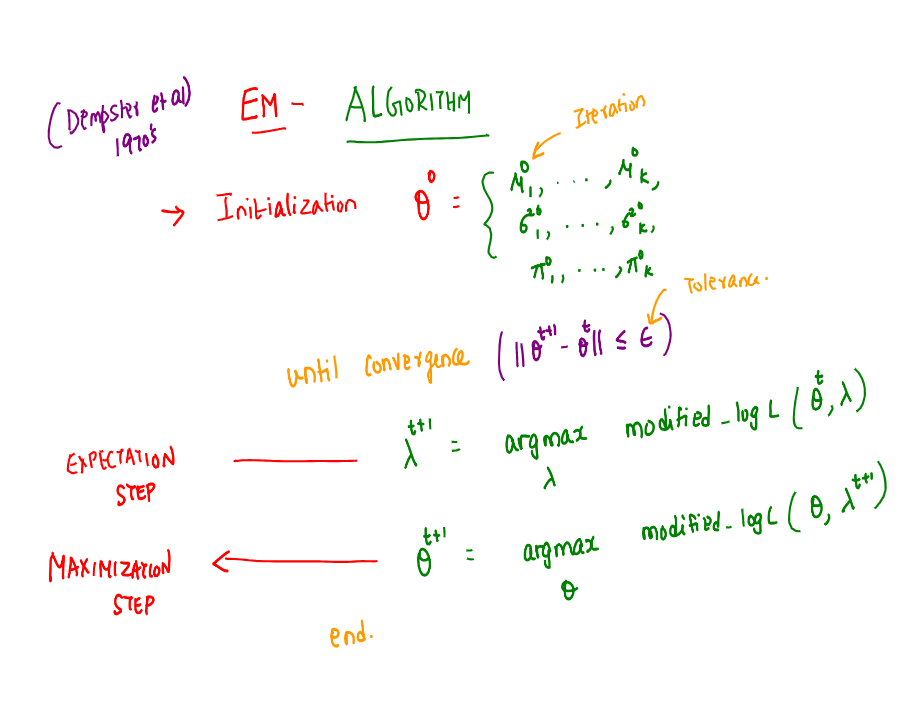

In [ ]:
""" 
As the data consists of 1s and 0s, it is a safe assumption to try out a Bernoulli Distribution. The equations 
followed are given below.
"""

## Equation 1

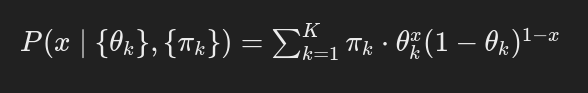

## Equation 2

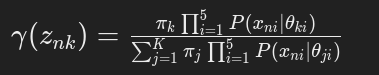

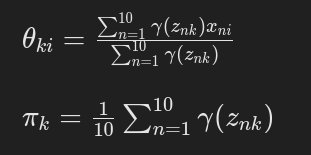

## Equation 3

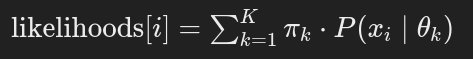

## Equation 4

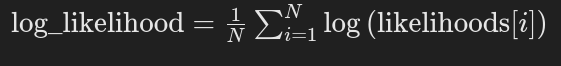

In [11]:
# Number of Mixtures
k = 4

In [6]:
# To calculate the probability distribution function of bernoulli
def bernoulli_pdf(x, theta):
    return np.prod(np.power(theta, x) * np.power(1 - theta, 1 - x), axis=1) # Eq 1

In [7]:
epsilon = 1e-6 # threshold for convergence
prev_log_likelihood = -np.inf
log_likelihoods = []

pi = np.random.dirichlet(np.ones(k)) # proportion of mixtures um to one
thetas = np.random.rand(k, data.shape[1]) # params to define the distribution

while True:
    lambdaa = np.zeros((data.shape[0], len(pi))) 

    for k in range(len(pi)):
        lambdaa[:, k] = pi[k] * bernoulli_pdf(data, thetas[k]) # eq 2
    lambdaa /= np.sum(lambdaa, axis=1)[:, np.newaxis]

    sum_ = np.sum(lambdaa, axis=0)
    pi = sum_ / data.shape[0]
    thetas = np.dot(lambdaa.T, data) / sum_[:, np.newaxis]

    # Eq 3 and 4
    likelihoods = np.zeros(data.shape[0])
    for k in range(len(pi)):
        likelihoods += pi[k] * bernoulli_pdf(data, thetas[k])
    log_likelihood = np.mean(np.log(likelihoods))
    log_likelihoods.append(log_likelihood)
    
    print(np.abs(log_likelihood - prev_log_likelihood))
    if np.abs(log_likelihood - prev_log_likelihood) < epsilon:
        break
    prev_log_likelihood = log_likelihood



inf
1.6022462911581776
0.12212378741284269
0.015100341393182504
0.011599571179107926
0.009969244762970675
0.007597310749073216
0.005572453683566181
0.005176732642162563
0.005087415021414188
0.003804253283774983
0.0026822589246222606
0.0021795276149951803
0.0018079881906984951
0.0013890124677864435
0.0010408977539881903
0.0008144537214676006
0.0006546129731788142
0.0005268083696243764
0.0004296601958770907
0.000371342064919844
0.00035612645423910294
0.0003804200648467315
0.0004292053775110105
0.0004807701481901461
0.0005315364278786205
0.0005837552255485434
0.0005815566371047964
0.0004996282208047376
0.0004646673012480562
0.0005780276328763989
0.0008242367515229887
0.0010551081479235336
0.0010194786360884223
0.0007292372600353758
0.0004604578396616432
0.0003219571493779938
0.00027341533577995847
0.0002692098915808572
0.00027915704859893253
0.0002822655438414756
0.00026995397411155864
0.0002491563126483243
0.00023295273402723637
0.0002263413233833944
0.0002209925245963973
0.0002027682967

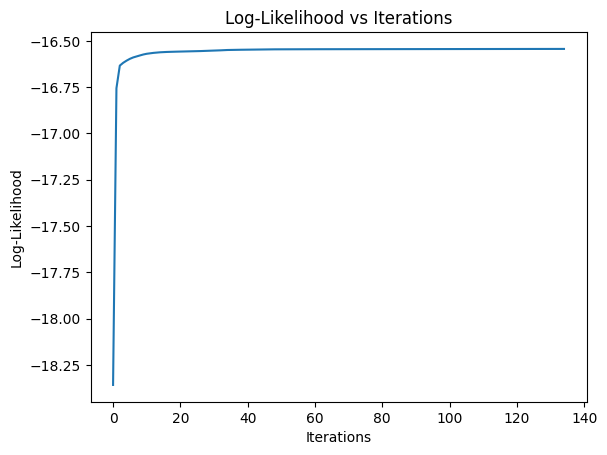

In [8]:
import matplotlib.pyplot as plt

plt.plot(log_likelihoods)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Iterations')
plt.show()

ii) Assume that the same data was infact generated from a mixture of Gaussians
with 4 mixtures. Implement the EM algorithm and plot the log-likelihood (aver-
aged over 100 random initializations of the parameters) as a function of iterations.
How does the plot compare with the plot from part (i)? Provide insights that
you draw from this experiment

In [12]:
epsilon = 1e-6
prev_log_likelihood = -np.inf

log_likelihoods = []
pi = np.random.dirichlet(np.ones(k))
mus = np.random.rand(k, data.shape[1])  
sigmas = [np.eye(data.shape[1]) for _ in range(k)]

Multivariate Gaussian Distribution

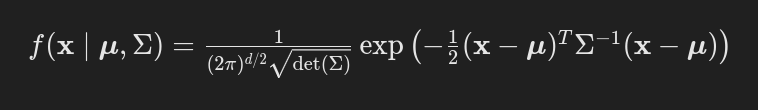

In [13]:
def gaussian_pdf(x, mean, cov):
    d = len(mean)
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    diff = x - mean
    exponent = -0.5 * np.sum(diff.dot(inv_cov) * diff, axis=1)
    normalization = 1.0 / (np.sqrt((2 * np.pi)** d * det_cov))
    pdf = normalization * np.exp(exponent)
    
    return pdf

In [14]:
while True:
    
    lambdaa = np.zeros((data.shape[0], len(pi)))
    for k in range(len(pi)):
        lambdaa[:, k] = pi[k] * gaussian_pdf(data, mus[k], sigmas[k])
    lambdaa /= np.sum(lambdaa, axis=1)[:, np.newaxis]

    N_k = np.sum(lambdaa, axis=0)
    pi = N_k / data.shape[0]
    mus = np.dot(lambdaa.T, data) / N_k[:, np.newaxis]  # Update means

    sigmas = []
    for k_idx in range(len(pi)):
        diff = data - mus[k_idx]
        sigma = np.dot(lambdaa[:, k_idx] * diff.T, diff) / N_k[k_idx]  # Update covariances
        sigma += np.eye(data.shape[1]) * 0.00001
        sigmas.append(sigma)

    likelihoods = np.zeros(data.shape[0])
    for k_idx in range(len(pi)):
        likelihoods += pi[k_idx] * gaussian_pdf(data, mus[k_idx], sigmas[k_idx])  # Calculate likelihoods

    log_likelihood = np.mean(np.log(likelihoods + 0.00001))
    log_likelihoods.append(log_likelihood)
    
    print(np.abs(log_likelihood - prev_log_likelihood))
    if np.abs(log_likelihood - prev_log_likelihood) < epsilon:
        break
    prev_log_likelihood = log_likelihood


inf
5.792555684979827
5.487925472015187
1.270748612591218
0.09011893947124605
0.053702633309309356
0.005057495541737289
0.003805873785322156
0.0036812699056403275
0.019549767627689896
0.11272203323954155
0.04163152778722079
0.000952692847759451
0.01575273234644925
0.05755382828137545
6.917730752853402e-05
1.64686214461085e-05
1.560218715468409e-05
2.43386582585714e-05
8.680810748451506e-05
0.0022199829752604927
0.06067585092990058
0.01203312806894008
2.343731208753752e-05
4.237491302738761e-06
1.0555650913346426e-06
2.83815384527486e-07


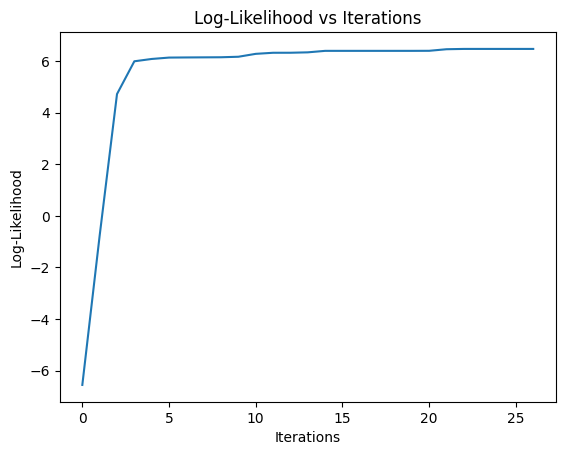

In [15]:
import matplotlib.pyplot as plt

plt.plot(log_likelihoods)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Iterations')
plt.show()

iii) Run the K-means algorithm with K = 4 on the same data. Plot the objective of
K −means as a function of iterations

In [184]:
data.shape

(400, 50)

In [185]:
k = 4
N = data.shape[0]
d = data.shape[1]


In [186]:
means = np.random.uniform(low=np.min(data), high=np.max(data), size=(k, d))
prev_obj = np.inf
obj_fun = []

Z = [np.argmin([np.linalg.norm(data[i] - means[j]) for j in range(k)]) for i  in range(N)]
error = np.sum([np.linalg.norm(data[i] - means[Z[i]]) for i in range(N)])
Z = np.array(Z)
err = [error]

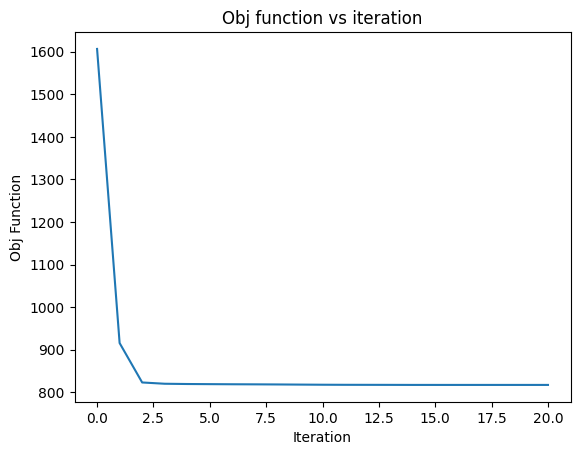

In [191]:
while True:
    new_mean = np.array([np.mean(data[Z == [i]*N], axis=0) for i in range(k)])
    
    new_Z = np.array([np.argmin(np.array([np.linalg.norm(data[i] - new_mean[j]) for j in range(k)])) for i  in range(N)])
    new_error = np.sum([np.linalg.norm(data[i] - new_mean[Z[i]]) for i in range(N)])
    err.append(new_error)
    
    if new_error >= error:
        break

    error = new_error
    Z = new_Z



plt.plot(err)
plt.title("Obj function vs iteration")
plt.xlabel("Iteration")
plt.ylabel("Obj Function")
plt.show()




iv. Among the three different algorithms implemented above, which do you think
you would choose to for this dataset and why?

In [ ]:
""" Using Mixed Mixture Models with Bernoulli took more iterations than the others."""